<a href="https://colab.research.google.com/github/hanna23456/web-repo/blob/master/Copy_of_kakku_for_tomorrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

thyroid=pd.read_csv("/content/balanced_thyroid_dataset (1).csv")
thyroid.head()

,Age,FTI,FTI Measured,Goitre,Hypopituitary,I131 Treatment,Lithium,On Antithyroid Medication,On Thyroxine,Pregnant,...,T3 Measured,T4U,T4U Measured,TSH,TSH Measured,TT4,TT4 Measured,Thyroid Surgery,Tumor,Category
0,41,0,0,0,0,0,0,0,0,0,...,1.30,1,2.5,1,125.0,1,1.14,1,109.0,0
1,23,0,0,0,0,0,0,0,0,0,...,4.10,1,2.0,1,102.0,0,0.97,0,106.0,0
2,46,1,0,0,0,0,0,0,0,0,...,0.98,0,1.9,1,109.0,1,0.91,1,120.0,0
3,70,0,1,0,0,0,0,0,0,0,...,0.16,1,1.9,1,175.0,0,0.97,0,106.0,0
4,70,0,0,0,0,0,0,0,0,0,...,0.72,1,1.2,1,61.0,1,0.87,1,70.0,0


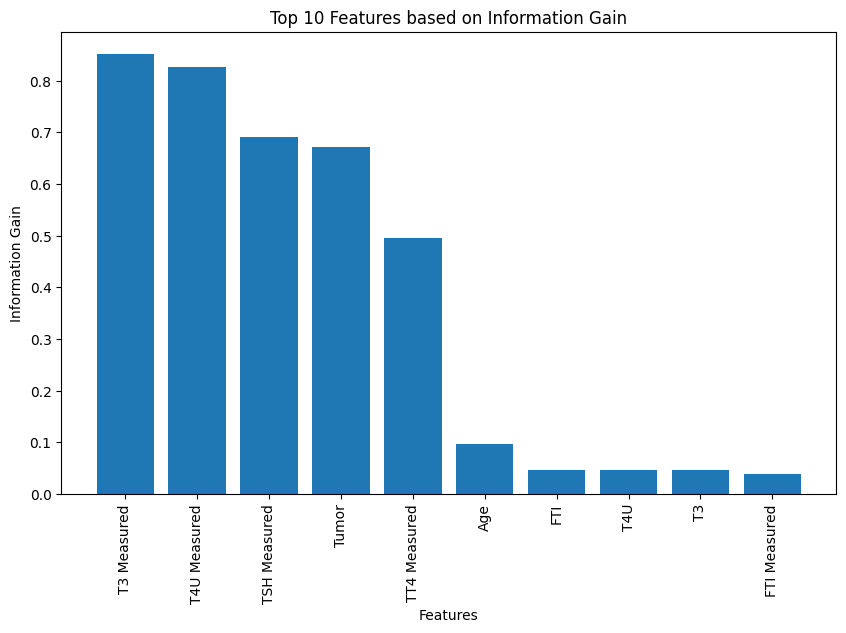

         Feature  Information Gain
16   T3 Measured          0.852280
18  T4U Measured          0.826232
20  TSH Measured          0.690558
24         Tumor          0.671027
22  TT4 Measured          0.494666
0            Age          0.096447
1            FTI          0.046884
17           T4U          0.046805
15            T3          0.045863
2   FTI Measured          0.039103


In [ ]:
# prompt: perform feature selection on 10 features give graph and feature name using information gain

import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Assuming 'thyroid' DataFrame is already loaded

# Separate features (X) and target (y)
X = thyroid.drop('Category', axis=1)
y = thyroid['Category']

# Calculate information gain for each feature
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame to store feature names and their information gain
feature_importance = pd.DataFrame({'Feature': X.columns, 'Information Gain': mutual_info})

# Sort features by information gain in descending order
feature_importance = feature_importance.sort_values('Information Gain', ascending=False)

# Select top 10 features
top_10_features = feature_importance.head(10)

# Plot the information gain for top 10 features
plt.figure(figsize=(10, 6))
plt.bar(top_10_features['Feature'], top_10_features['Information Gain'])
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.title('Top 10 Features based on Information Gain')
plt.xticks(rotation=90)
plt.show()

# Print the feature names and their information gain
print(top_10_features)

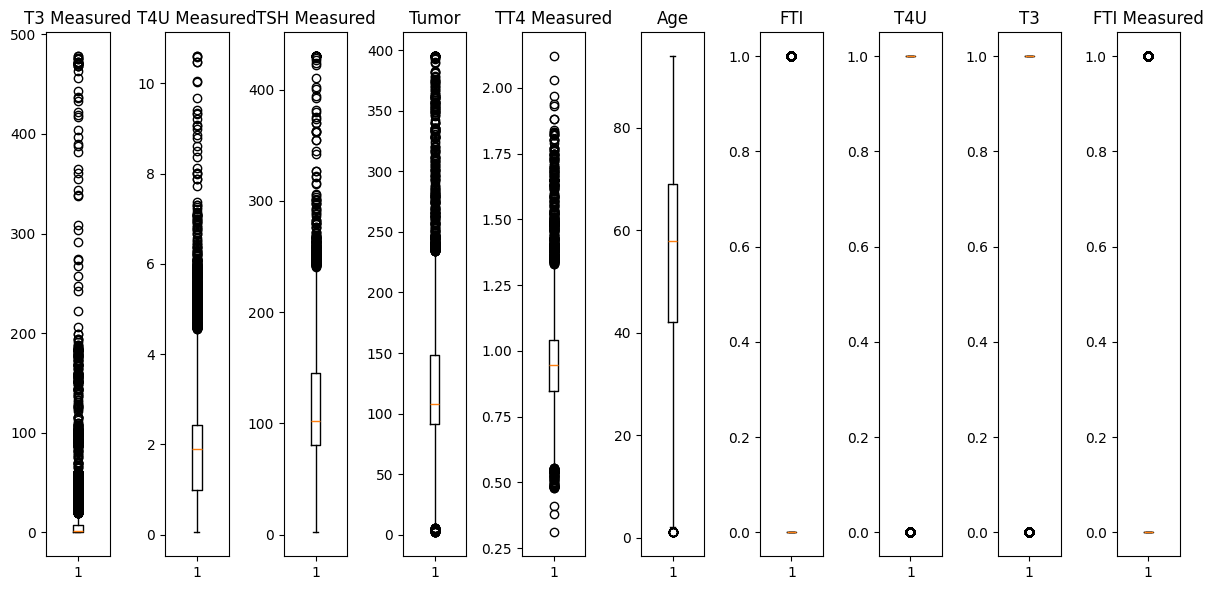

In [ ]:
# prompt: check outliers using boxplot in small frame on selected features

# Assuming 'thyroid' DataFrame and 'top_10_features' are already defined

# Select the top 3 features for outlier detection
selected_features = top_10_features['Feature'][:10].tolist()

# Create a smaller DataFrame with only the selected features
small_frame = thyroid[selected_features]

# Create box plots for each selected feature to identify outliers
plt.figure(figsize=(12, 6))
for i, feature in enumerate(selected_features):
  plt.subplot(1, len(selected_features), i + 1)
  plt.boxplot(small_frame[feature])
  plt.title(feature)

plt.tight_layout()
plt.show()

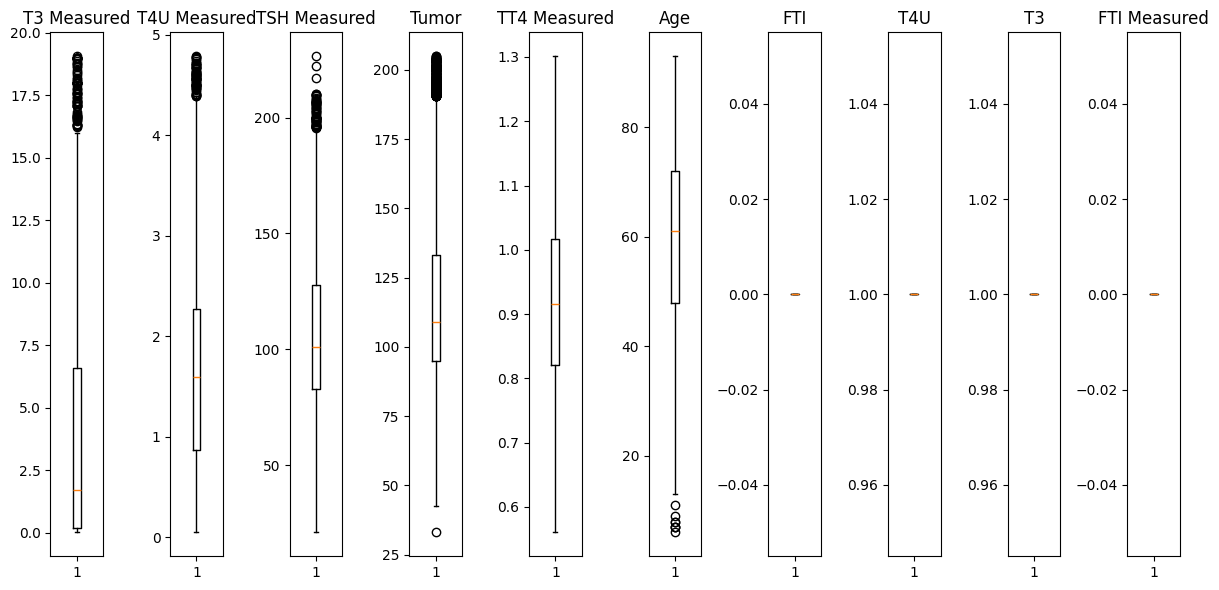

In [ ]:
# prompt: remove outliers from selected feature using filter and give graph

import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'thyroid' DataFrame and 'top_10_features' are already defined

# Select the top 3 features for outlier detection
selected_features = top_10_features['Feature'][:10].tolist()

# Create a smaller DataFrame with only the selected features
small_frame = thyroid[selected_features]

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, feature):
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
  return df_filtered


# Remove outliers for each selected feature
for feature in selected_features:
  thyroid = remove_outliers_iqr(thyroid, feature)

# Create a smaller DataFrame with only the selected features after removing outliers
small_frame_filtered = thyroid[selected_features]



# Create box plots for each selected feature to identify outliers after removal
plt.figure(figsize=(12, 6))
for i, feature in enumerate(selected_features):
  plt.subplot(1, len(selected_features), i + 1)
  plt.boxplot(small_frame_filtered[feature])
  plt.title(feature)

plt.tight_layout()
plt.show()

In [ ]:
# prompt: give me the number record in each class and make all class have same number  of data

# Assuming 'thyroid' DataFrame is already loaded and outliers are removed

# Get the number of records for each class
class_counts = thyroid['Category'].value_counts()
print("Number of records in each class:\n", class_counts)

# Find the minimum number of records in any class
min_class_count = class_counts.min()

# Create a new DataFrame with a balanced number of records for each class
balanced_thyroid = pd.DataFrame()
for category in thyroid['Category'].unique():
  # Get records for the current class
  class_records = thyroid[thyroid['Category'] == category]
  # Sample a subset of records equal to the minimum count
  sampled_records = class_records.sample(n=min_class_count, random_state=42)
  # Append the sampled records to the new DataFrame
  balanced_thyroid = pd.concat([balanced_thyroid, sampled_records])

# Verify the number of records in each class in the balanced DataFrame
balanced_class_counts = balanced_thyroid['Category'].value_counts()
print("\nNumber of records in each class after balancing:\n", balanced_class_counts)


Number of records in each class:
 Category
3    2032
0    1092
2    1063
1    1006
Name: count, dtype: int64

Number of records in each class after balancing:
 Category
0    1006
1    1006
2    1006
3    1006
Name: count, dtype: int64


In [ ]:
# prompt: normalise the balanced data and don't normalise category column if there is null value then remove them

# Assuming 'balanced_thyroid' DataFrame is already loaded and outliers are removed

# Separate features (X) and target (y)
X = balanced_thyroid.drop('Category', axis=1)
y = balanced_thyroid['Category']

# Remove rows with null values
X = X.dropna()
y = y[X.index]

# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

# Normalise numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Concatenate the normalised features and target variable
balanced_thyroid_normalised = pd.concat([X, y], axis=1)

# Print the first few rows of the normalised and balanced dataset
print(balanced_thyroid_normalised.head())

           Age  FTI  FTI Measured  Goitre  Hypopituitary  I131 Treatment  \
1258  0.770115  0.0           0.0     0.0            0.0             1.0   
395   0.379310  0.0           0.0     0.0            0.0             0.0   
245   0.459770  0.0           0.0     0.0            0.0             0.0   
2190  0.678161  0.0           0.0     0.0            0.0             0.0   
1892  0.804598  0.0           0.0     0.0            0.0             0.0   

      Lithium  On Antithyroid Medication  On Thyroxine  Pregnant  ...  \
1258      0.0                        0.0           0.0       0.0  ...   
395       0.0                        0.0           0.0       0.0  ...   
245       0.0                        0.0           0.0       0.0  ...   
2190      0.0                        0.0           0.0       0.0  ...   
1892      0.0                        0.0           0.0       1.0  ...   

      T3 Measured  T4U  T4U Measured  TSH  TSH Measured  TT4  TT4 Measured  \
1258     0.083670  0.0    

In [ ]:
# prompt: fit model  using svm using normalized data and print accuracy and classification report

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Assuming 'balanced_thyroid_normalised' DataFrame is already loaded and processed

# Separate features (X) and target (y)
X = balanced_thyroid_normalised.drop('Category', axis=1)
y = balanced_thyroid_normalised['Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_model = SVC(kernel='linear')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nconfusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8608695652173913

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.70      0.81       212
           1       0.87      0.99      0.93       203
           2       0.82      0.96      0.89       193
           3       0.82      0.81      0.81       197

    accuracy                           0.86       805
   macro avg       0.87      0.86      0.86       805
weighted avg       0.87      0.86      0.86       805


confusion matrix:
 [[148  16  18  30]
 [  2 201   0   0]
 [  2   0 185   6]
 [  2  14  22 159]]


In [ ]:
# prompt: how many records are taken for testing count

# Assuming 'balanced_thyroid_normalised' DataFrame is already loaded and processed

# Separate features (X) and target (y)
X = balanced_thyroid_normalised.drop('Category', axis=1)
y = balanced_thyroid_normalised['Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of records for testing:", len(X_test))

Number of records for testing: 805


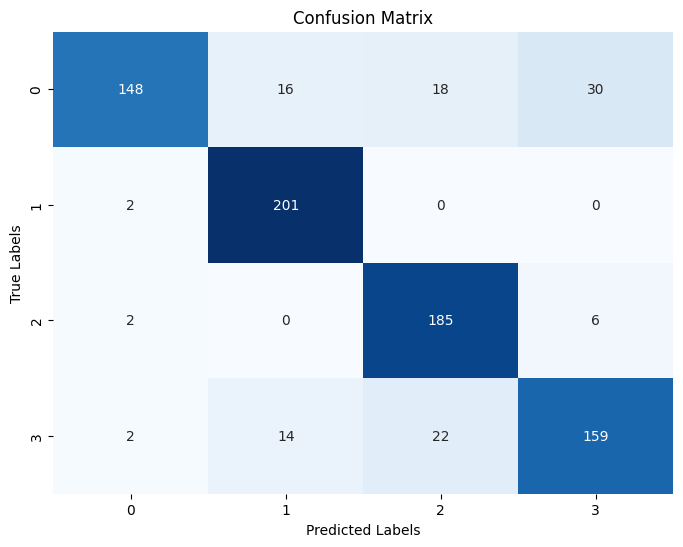

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already computed y_test and y_pred

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# prompt: improve accuracy and classification report

# Assuming 'balanced_thyroid_normalised' DataFrame is already loaded and processed

# Separate features (X) and target (y)
X = balanced_thyroid_normalised.drop('Category', axis=1)
y = balanced_thyroid_normalised['Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the SVM model with hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10,100],
              'gamma': [0.001,0.01, 0.1, 1,10],
              'kernel': ['linear', 'rbf', 'poly']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

# Make predictions on the test set using the best estimator
y_pred = grid.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.848 total time=   0.1s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.849 total time=   0.2s
[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.858 total time=   0.2s
[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.854 total time=   0.2s
[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.824 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.257 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.256 total time=   0.5s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.256 total time=   0.5s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.256 total time=   0.5s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.256 total time=   0.5s
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.257 total time=   0.4s
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=poly

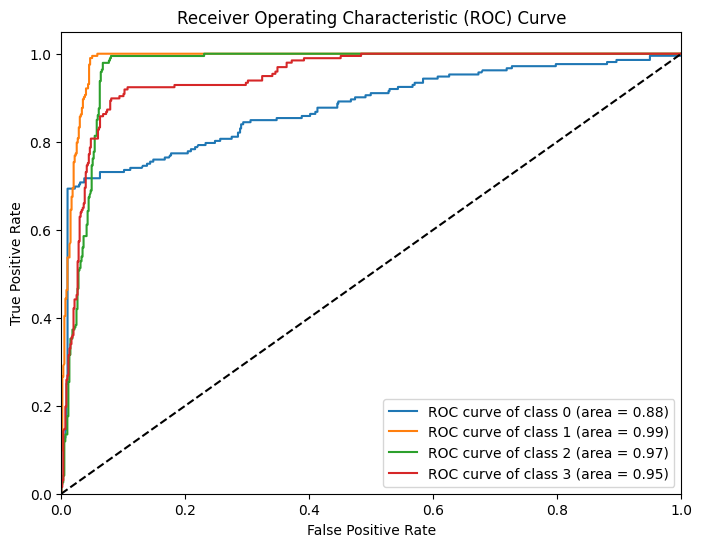

In [ ]:
# prompt: roc and auc curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming you have already trained your model and have y_test and y_pred

# Binarize the labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = svm_model.decision_function(X_test)  # Get decision function scores for ROC

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# prompt: prediction using selected features output using inputbox

#@title Prediction using selected features
import ipywidgets as widgets
from IPython.display import display

# Assuming 'balanced_thyroid_normalised', 'X_train', 'y_train', 'svm_model' are defined

# Create input boxes for each feature
input_boxes = {}
for feature in X_train.columns:
  input_boxes[feature] = widgets.FloatText(description=feature)

# Create a button to trigger prediction
predict_button = widgets.Button(description="Predict")

# Function to handle button click
def on_predict_button_clicked(b):
  # Get input values from the boxes
  input_data = [box.value for box in input_boxes.values()]

  # Convert input data to a DataFrame
  input_df = pd.DataFrame([input_data], columns=X_train.columns)

  # Make prediction using the trained model
  prediction = svm_model.predict(input_df)

  # Display the prediction
  print("Prediction:", prediction[0])

# Attach the function to the button's click event
predict_button.on_click(on_predict_button_clicked)

# Display the input boxes and button
display(*input_boxes.values(), predict_button)

FloatText(value=0.0, description='Age')

FloatText(value=0.0, description='FTI')

FloatText(value=0.0, description='FTI Measured')

FloatText(value=0.0, description='Goitre')

FloatText(value=0.0, description='Hypopituitary')

FloatText(value=0.0, description='I131 Treatment')

FloatText(value=0.0, description='Lithium')

FloatText(value=0.0, description='On Antithyroid Medication')

FloatText(value=0.0, description='On Thyroxine')

FloatText(value=0.0, description='Pregnant')

FloatText(value=0.0, description='Psych')

FloatText(value=0.0, description='Query 1')

FloatText(value=0.0, description='Query 2')

FloatText(value=0.0, description='Query on Thyroxine')

FloatText(value=0.0, description='Query 3')

FloatText(value=0.0, description='T3')

FloatText(value=0.0, description='T3 Measured')

FloatText(value=0.0, description='T4U')

FloatText(value=0.0, description='T4U Measured')

FloatText(value=0.0, description='TSH')

FloatText(value=0.0, description='TSH Measured')

FloatText(value=0.0, description='TT4')

FloatText(value=0.0, description='TT4 Measured')

FloatText(value=0.0, description='Thyroid Surgery')

FloatText(value=0.0, description='Tumor')

Button(description='Predict', style=ButtonStyle())

Prediction: 1


In [ ]:
# prompt: prediction using selected features output using inputbox

#@title Prediction using selected features
import ipywidgets as widgets
from IPython.display import display

# Assuming 'balanced_thyroid_normalised', 'X_train', 'y_train', 'svm_model' are defined

# Create input boxes for each feature
input_boxes = {}
for feature in X_train.columns:
  input_boxes[feature] = widgets.FloatText(description=feature)

# Create a button to trigger prediction
predict_button = widgets.Button(description="Predict")

# Function to handle button click
def on_predict_button_clicked(b):
  # Get input values from the boxes
  input_data = [box.value for box in input_boxes.values()]

  # Convert input data to a DataFrame
  input_df = pd.DataFrame([input_data], columns=X_train.columns)

  # Make prediction using the trained model
  prediction = svm_model.predict(input_df)

  # Display the prediction
  print("Prediction:", prediction[0])

# Attach the function to the button's click event
predict_button.on_click(on_predict_button_clicked)

# Display the input boxes and button
display(*input_boxes.values(), predict_button)

FloatText(value=0.0, description='Age')

FloatText(value=0.0, description='FTI')

FloatText(value=0.0, description='FTI Measured')

FloatText(value=0.0, description='Goitre')

FloatText(value=0.0, description='Hypopituitary')

FloatText(value=0.0, description='I131 Treatment')

FloatText(value=0.0, description='Lithium')

FloatText(value=0.0, description='On Antithyroid Medication')

FloatText(value=0.0, description='On Thyroxine')

FloatText(value=0.0, description='Pregnant')

FloatText(value=0.0, description='Psych')

FloatText(value=0.0, description='Query 1')

FloatText(value=0.0, description='Query 2')

FloatText(value=0.0, description='Query on Thyroxine')

FloatText(value=0.0, description='Query 3')

FloatText(value=0.0, description='T3')

FloatText(value=0.0, description='T3 Measured')

FloatText(value=0.0, description='T4U')

FloatText(value=0.0, description='T4U Measured')

FloatText(value=0.0, description='TSH')

FloatText(value=0.0, description='TSH Measured')

FloatText(value=0.0, description='TT4')

FloatText(value=0.0, description='TT4 Measured')

FloatText(value=0.0, description='Thyroid Surgery')

FloatText(value=0.0, description='Tumor')

Button(description='Predict', style=ButtonStyle())

Prediction: 2


In [ ]:
# prompt: prediction using selected features output using inputbox

#@title Prediction using selected features
import ipywidgets as widgets
from IPython.display import display

# Assuming 'balanced_thyroid_normalised', 'X_train', 'y_train', 'svm_model' are defined

# Create input boxes for each feature
input_boxes = {}
for feature in X_train.columns:
  input_boxes[feature] = widgets.FloatText(description=feature)

# Create a button to trigger prediction
predict_button = widgets.Button(description="Predict")

# Function to handle button click
def on_predict_button_clicked(b):
  # Get input values from the boxes
  input_data = [box.value for box in input_boxes.values()]

  # Convert input data to a DataFrame
  input_df = pd.DataFrame([input_data], columns=X_train.columns)

  # Make prediction using the trained model
  prediction = svm_model.predict(input_df)

  # Display the prediction
  print("Prediction:", prediction[0])

# Attach the function to the button's click event
predict_button.on_click(on_predict_button_clicked)

# Display the input boxes and button
display(*input_boxes.values(), predict_button)

FloatText(value=0.0, description='Age')

FloatText(value=0.0, description='FTI')

FloatText(value=0.0, description='FTI Measured')

FloatText(value=0.0, description='Goitre')

FloatText(value=0.0, description='Hypopituitary')

FloatText(value=0.0, description='I131 Treatment')

FloatText(value=0.0, description='Lithium')

FloatText(value=0.0, description='On Antithyroid Medication')

FloatText(value=0.0, description='On Thyroxine')

FloatText(value=0.0, description='Pregnant')

FloatText(value=0.0, description='Psych')

FloatText(value=0.0, description='Query 1')

FloatText(value=0.0, description='Query 2')

FloatText(value=0.0, description='Query on Thyroxine')

FloatText(value=0.0, description='Query 3')

FloatText(value=0.0, description='T3')

FloatText(value=0.0, description='T3 Measured')

FloatText(value=0.0, description='T4U')

FloatText(value=0.0, description='T4U Measured')

FloatText(value=0.0, description='TSH')

FloatText(value=0.0, description='TSH Measured')

FloatText(value=0.0, description='TT4')

FloatText(value=0.0, description='TT4 Measured')

FloatText(value=0.0, description='Thyroid Surgery')

FloatText(value=0.0, description='Tumor')

Button(description='Predict', style=ButtonStyle())

In [ ]:
# prompt: prediction using selected features output using inputbox

#@title Prediction using selected features
import ipywidgets as widgets
from IPython.display import display

# Assuming 'balanced_thyroid_normalised', 'X_train', 'y_train', 'svm_model' are defined

# Create input boxes for each feature
input_boxes = {}
for feature in X_train.columns:
  input_boxes[feature] = widgets.FloatText(description=feature)

# Create a button to trigger prediction
predict_button = widgets.Button(description="Predict")

# Function to handle button click
def on_predict_button_clicked(b):
  # Get input values from the boxes
  input_data = [box.value for box in input_boxes.values()]

  # Convert input data to a DataFrame
  input_df = pd.DataFrame([input_data], columns=X_train.columns)

  # Make prediction using the trained model
  prediction = svm_model.predict(input_df)

  # Display the prediction
  print("Prediction:", prediction[0])

# Attach the function to the button's click event
predict_button.on_click(on_predict_button_clicked)

# Display the input boxes and button
display(*input_boxes.values(), predict_button)

FloatText(value=0.0, description='Age')

FloatText(value=0.0, description='FTI')

FloatText(value=0.0, description='FTI Measured')

FloatText(value=0.0, description='Goitre')

FloatText(value=0.0, description='Hypopituitary')

FloatText(value=0.0, description='I131 Treatment')

FloatText(value=0.0, description='Lithium')

FloatText(value=0.0, description='On Antithyroid Medication')

FloatText(value=0.0, description='On Thyroxine')

FloatText(value=0.0, description='Pregnant')

FloatText(value=0.0, description='Psych')

FloatText(value=0.0, description='Query 1')

FloatText(value=0.0, description='Query 2')

FloatText(value=0.0, description='Query on Thyroxine')

FloatText(value=0.0, description='Query 3')

FloatText(value=0.0, description='T3')

FloatText(value=0.0, description='T3 Measured')

FloatText(value=0.0, description='T4U')

FloatText(value=0.0, description='T4U Measured')

FloatText(value=0.0, description='TSH')

FloatText(value=0.0, description='TSH Measured')

FloatText(value=0.0, description='TT4')

FloatText(value=0.0, description='TT4 Measured')

FloatText(value=0.0, description='Thyroid Surgery')

FloatText(value=0.0, description='Tumor')

Button(description='Predict', style=ButtonStyle())

Prediction: 0
